## data control(결측값 처리)

<목차>
+ [x] 1.data load/확인
+ [x] 2.결측값 대체
  + [x] 1.missing value 평균대체
  + [x] 2.missing value column 삭제
  + [x] 3.missing value row 삭제 

In [15]:
import pandas as pd
import os
import numpy as np

import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
%matplotlib inline

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)                               # 한글폰트 설정(전역)

import warnings
warnings.filterwarnings('ignore')

## 1.data load/확인

In [37]:
# sample
import seaborn as sns
df1 = sns.load_dataset("titanic")


# local
# df1 = pd.read_csv('./190726_t-mon_review.csv', encoding = 'cp949', low_memory=False)


In [38]:
df1.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [39]:
print("<data overview : AGE>")
print("평균 연령: {}세.".format(df1['age'].mean()))
print("연령 상위 99% : {:.1f}세 ".format(df1['age'].quantile(0.99)))
# print("이미지 첨부 평균 : {:.2f}개, ".format(df1['IMAGE_COUNT'].mean()))
print("최소/최대 연령 : {} ~ {}".format(df1['age'].min(), df1['age'].max()))

<data overview : AGE>
평균 연령: 29.69911764705882세.
연령 상위 99% : 65.9세 
최소/최대 연령 : 0.42 ~ 80.0


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [41]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


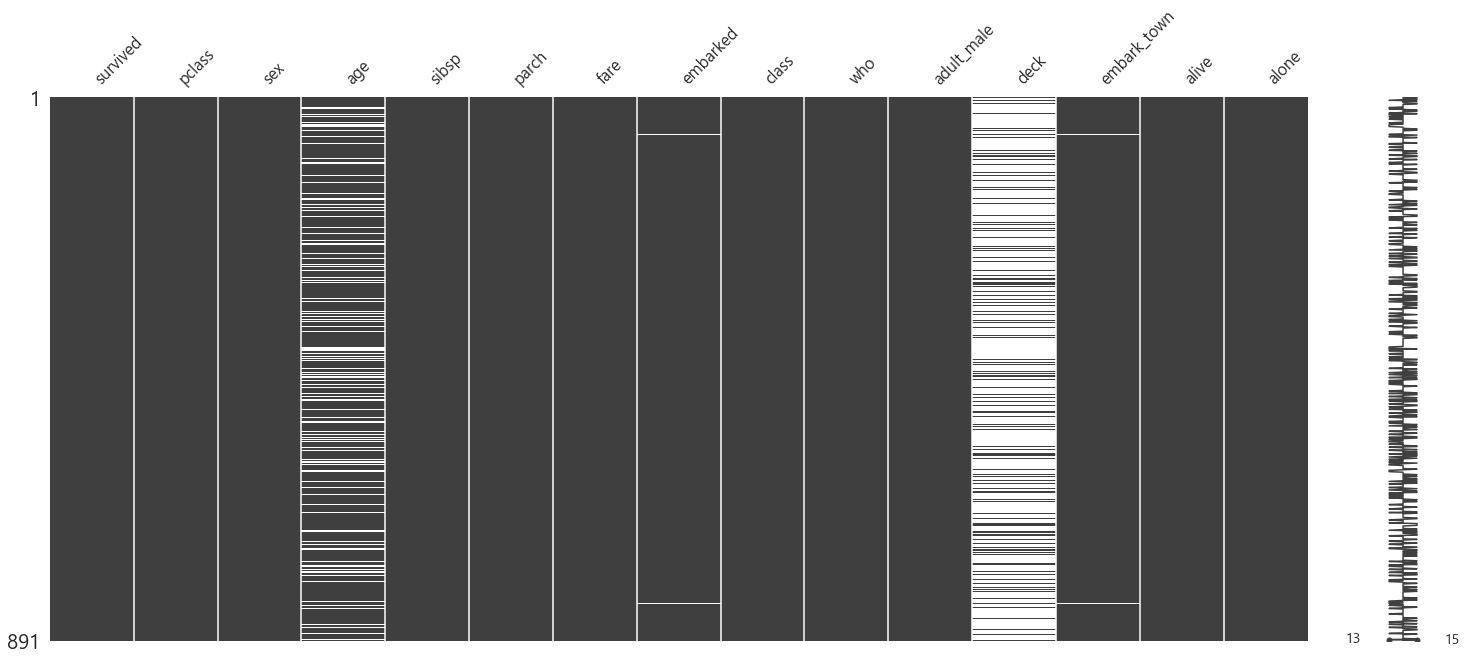

In [42]:
import missingno as msno

msno.matrix(df1)
plt.show()

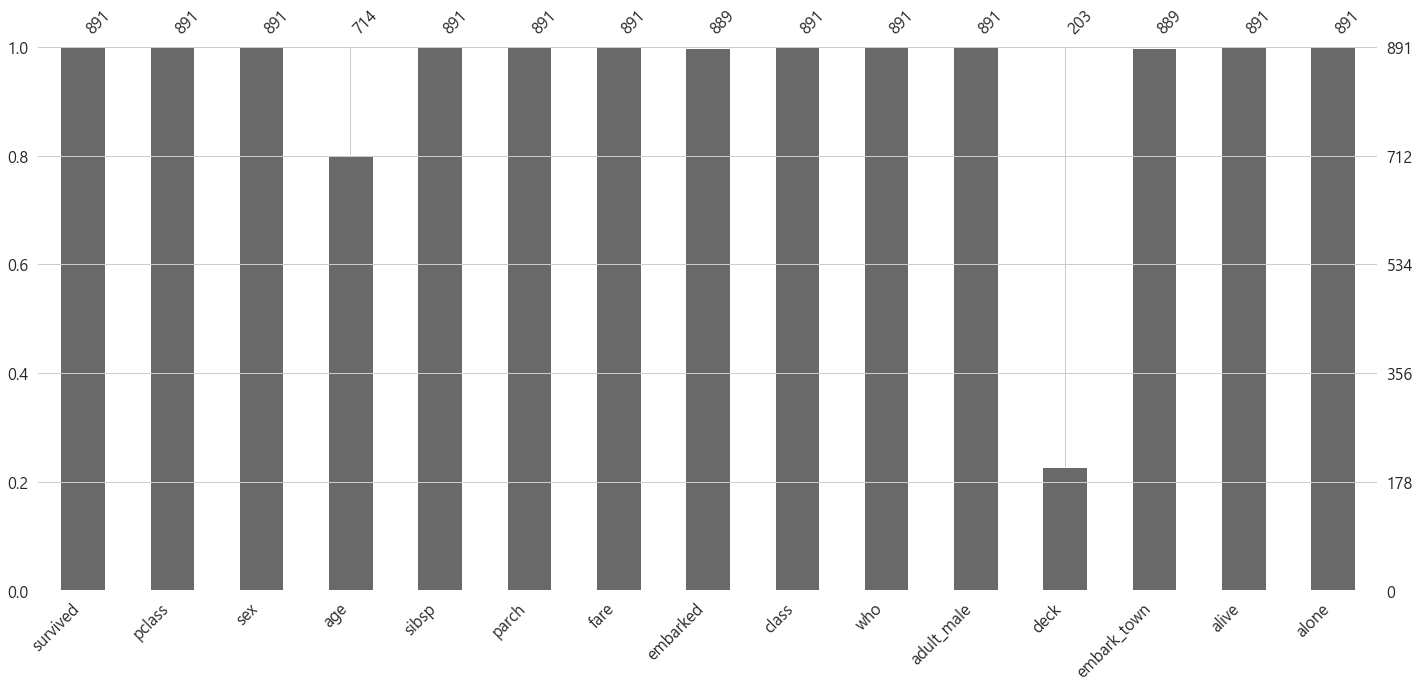

In [43]:
msno.bar(df1)
plt.show()

## 2.결측값 변환(삭제)
+ missing value가 **적으면**, 1)평균값 등으로 대체 또는 3)관련 column 삭제
+ missing value가 **많으면**, 2)col을 삭제(=미사용)

In [45]:
# missing value 평균대체
df2 = df1.copy()
df2['age'] = df2['age'].fillna(df2['age'].mean())

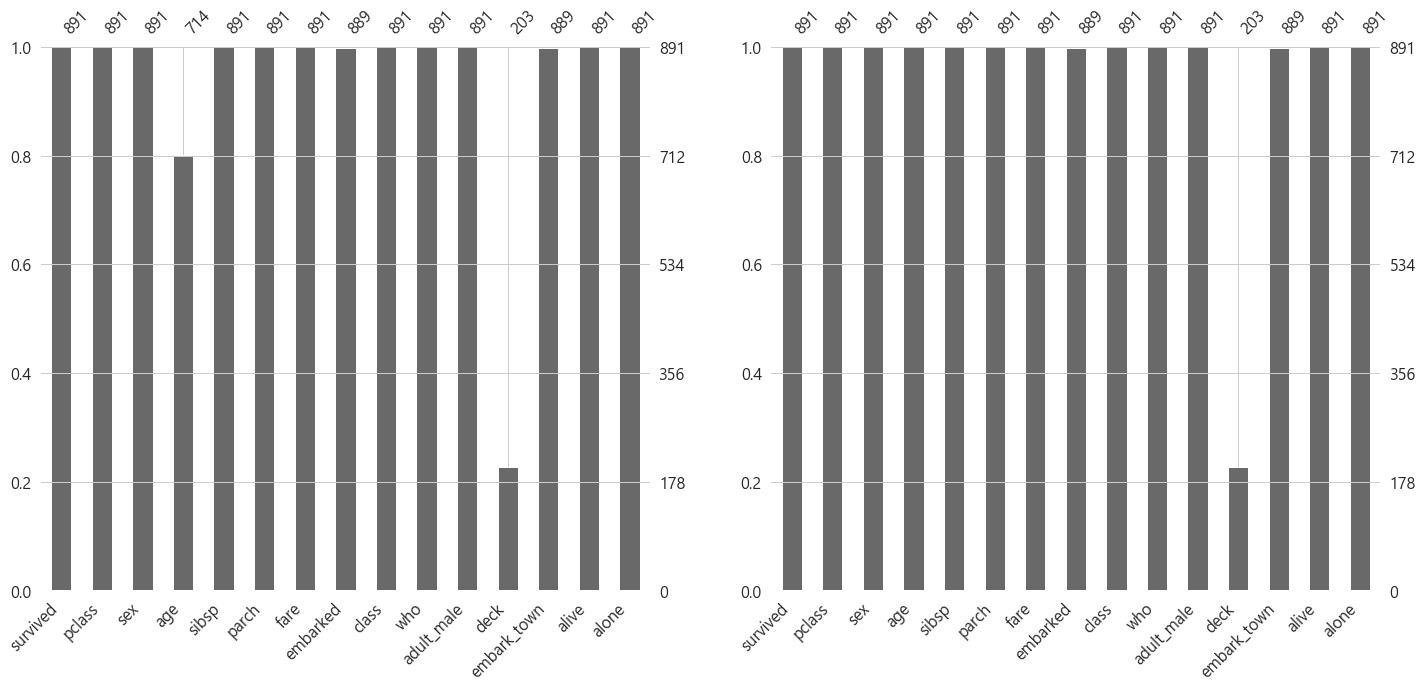

In [51]:
plt.subplot(1,2,1) 
msno.bar(df1)

plt.subplot(1,2,2) 
msno.bar(df2)

plt.show()

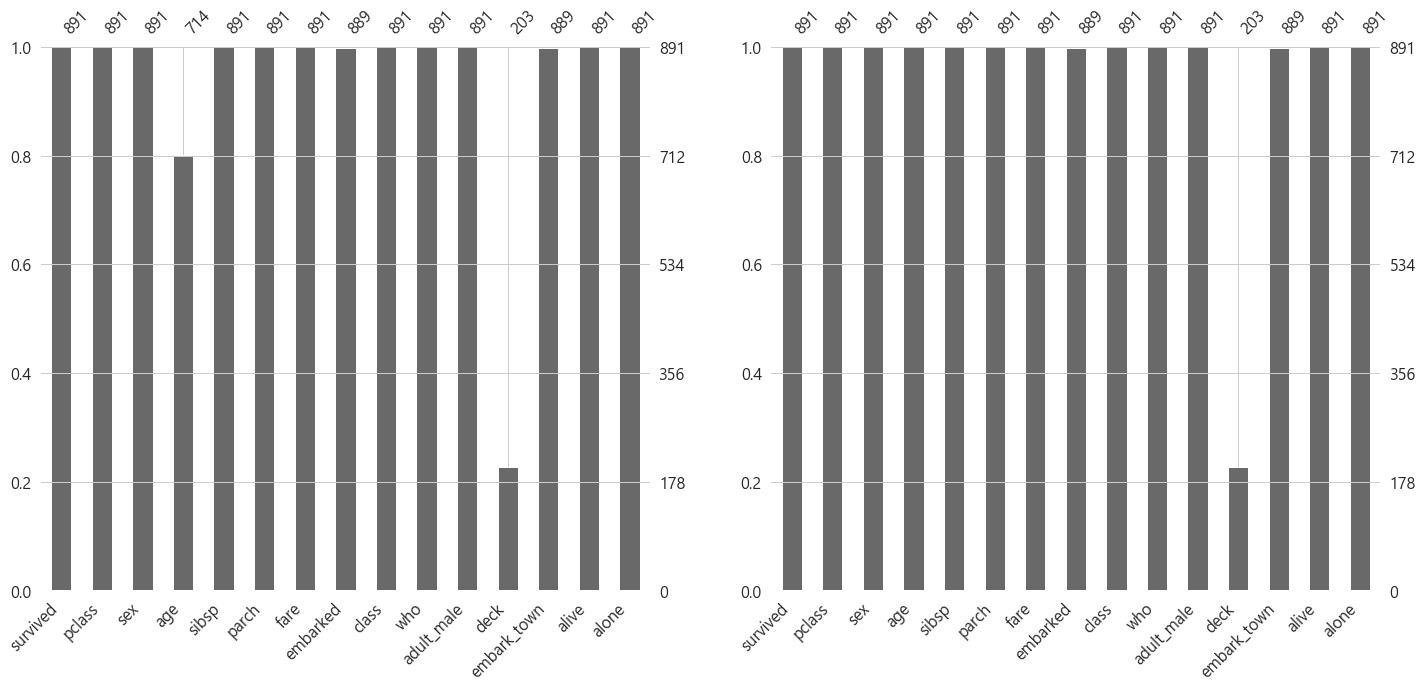

In [57]:
plt.subplot(1,2,1) 
msno.bar(df1)

plt.subplot(1,2,2) 
msno.bar(df2)

plt.show()

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


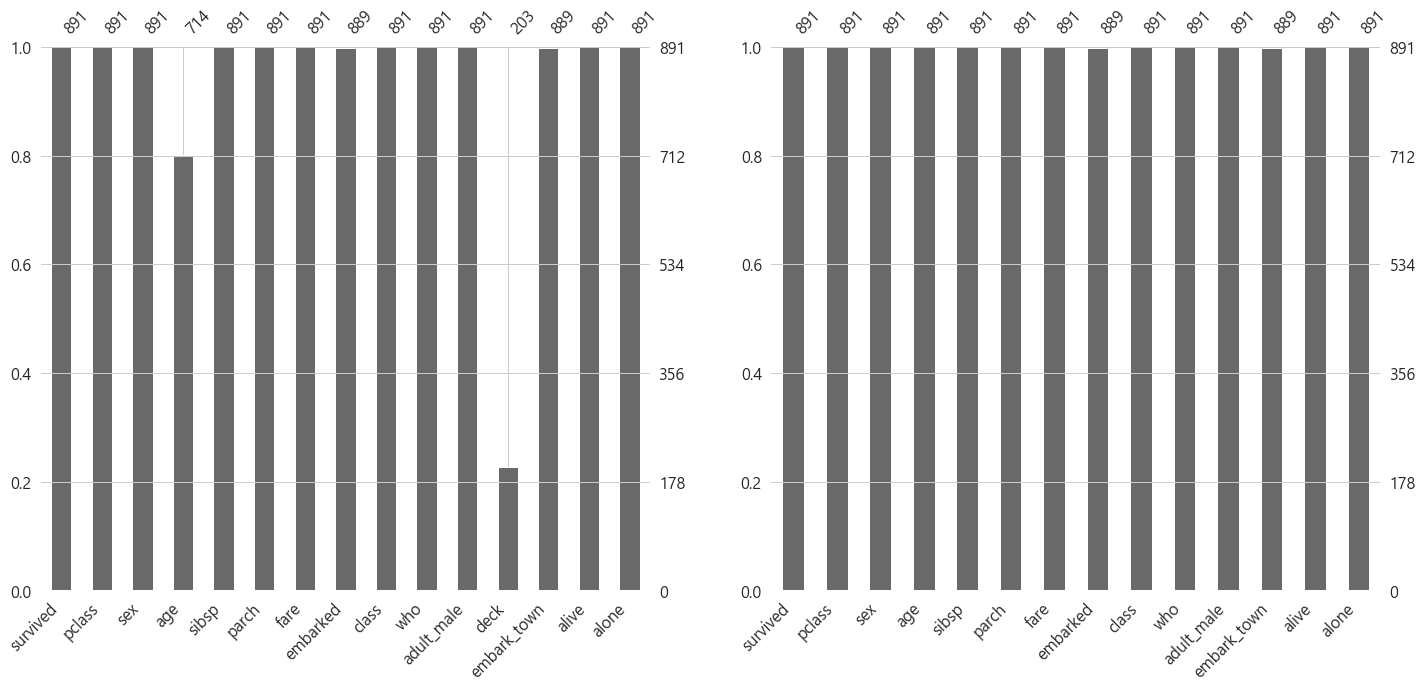

In [62]:
# 데이터가 절반 이상이 없는 열을 삭제
df2 = df2.dropna(thresh=int(len(df2) * 0.5), axis=1)

plt.subplot(1,2,1) 
msno.bar(df1)

plt.subplot(1,2,2) 
msno.bar(df2)

plt.show()

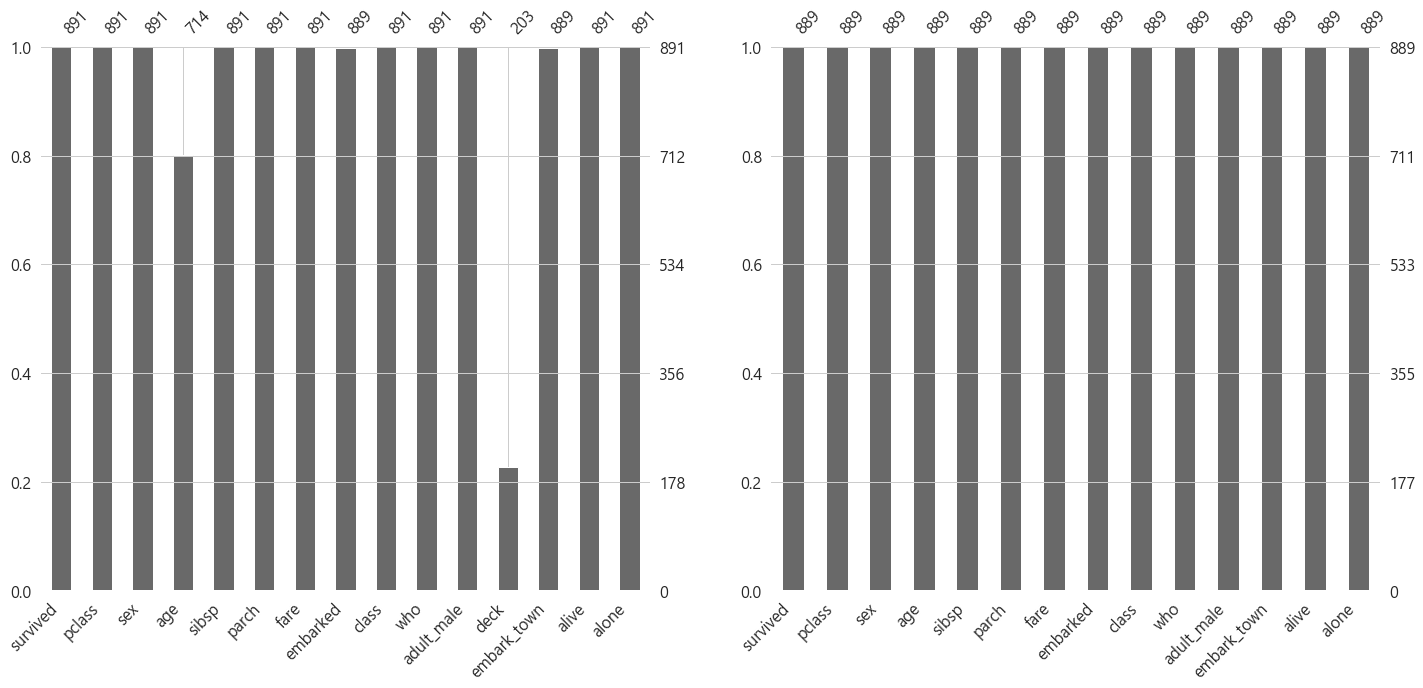

In [64]:
# missing value 삭제
df2 = df2.dropna()

plt.subplot(1,2,1) 
msno.bar(df1)

plt.subplot(1,2,2) 
msno.bar(df2)

plt.show()